In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 177MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.179967,0.024143,0.009472,00:46


epoch,train_loss,valid_loss,error_rate,time
0,0.052440,0.029028,0.007442,00:41


In [3]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,4.205915,2.732829,00:01


epoch,train_loss,valid_loss,time
0,2.052219,1.881641,00:01
1,1.731712,1.398611,00:01
2,1.545473,1.564253,00:01
3,1.457433,1.179856,00:01
4,1.334689,1.108695,00:01
5,1.216830,0.933623,00:01
6,1.116525,0.895605,00:01
7,1.036333,0.881584,00:01


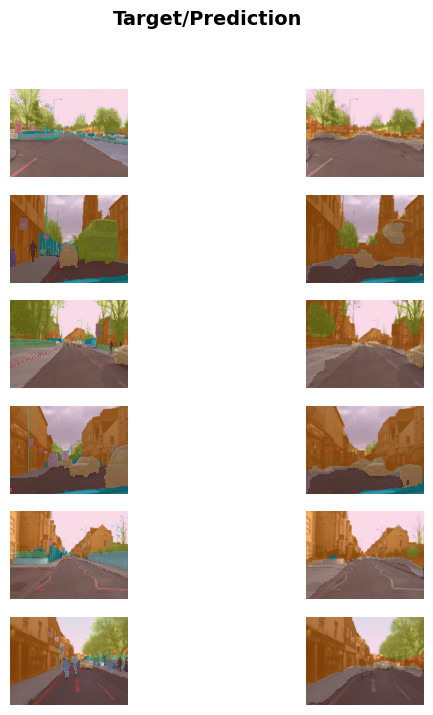

In [4]:
learn.show_results(max_n=6, figsize=(7,8))